# Problem 1

In [ ]:
# Load the dataset (it's classification problem where X is normalized)
import pandas as pd
import numpy as np
dataset = pd.read_csv('youngsdata.csv')

labels = dataset.columns[1:]
dataset.head()
np.random.seed(1)
dataset = dataset.values
dataset = dataset[:,1:]

np.random.shuffle(dataset)


X = dataset[:,:-1]
y = dataset[:,-1]
y = y.reshape(-1,1)


print(dataset.shape)
print(labels)
print(X.shape)

a) Split  the  dataset into training (80%) and  testing(20%)datasets using train_test_splitwith random_state = 1, then normalizethe dataset(both X and y)between0 and 1. 

In [ ]:
#Split Data into training and testing + normaize 
from sklearn.model_selection import train_test_split
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
 #Split training data into testing and validation
# X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

print(X_train.shape)

In [ ]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

y_train = y_train.astype('float')
y_test = y_test.astype('float')
# y_vlad = y_vald.astype('float')

In [ ]:
#Normalization of X
from sklearn.preprocessing import normalize

X_train_normalized = normalize(X_train, norm = 'l2')
X_test_normalized = normalize(X_test, norm = 'l2')
y_train_normalized = normalize(y_train, norm = 'l2')
y_test_normalized = normalize(y_test, norm = 'l2')
# y_vlad_normalized = normalize(y_train, norm = 'l2')

print(X_train_normalized.shape)


b)Fit  the  data  using  LinearRegression with  5-cross  validation  to  predict  the Young’s Modulus and report the MSE on each fold. Discuss the results and explain why we need to  use  crossvalidation on this  training  dataset  to evaluatethe  performance  of the model?

In [ ]:
#Call the relevant sklearn models
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Define the cross-validation split
cv = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 1)



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_normalized, y_train_normalized)

In [ ]:
from numpy import mean    
from numpy import std 

scores = cross_val_score(model, X_train_normalized, y_train_normalized, scoring = 'accuracy', cv = cv)
print(scores)
print(mean(scores))
print(std(scores))

# Problem 2

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# You need to change the line below based on your directory of where the data
data_dir = '/Users/leonardospallino/Desktop/Projects/matls4ML3/Assignment4/GarbageDataset/Garbage classification/Garbage classification'


In [42]:
# this code will look into the name of files in that directory (the name of classes)
labels = os.listdir(data_dir)
labels

['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']

In [43]:
# this code will show you how many images in each class
for label in labels:
    directory = os.path.join(data_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "paper":	 594
Images of label "metal":	 410
Images of label "cardboard":	 403
Images of label "trash":	 137
Images of label "glass":	 501
Images of label "plastic":	 482


In [44]:
# This code will store all the images in X and all the labels in y 
X = np.zeros((2527,384,512,3))
y = np.zeros((2527,1))
counter = 0
for L in range(len(labels)):
    directory = os.path.join(data_dir, labels[L])
    for j in range(len(os.listdir(directory))):
        X[counter][:][:][:] = mpimg.imread(os.path.join(directory, os.listdir(directory)[j]))
        y[counter] = L
        counter = counter + 1

X = X.astype('int')
y = y.astype('int')


In [45]:
print(X.shape)
print(y.shape)

(2527, 384, 512, 3)
(2527, 1)


### Part 1

Split the dataset into training (80%) and testing (20%), normalize the X matrix, and generate a 6 by 6 subplot to see some of the training images with their labels (36 images) **[4 marks]**

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('X_train_shape =',X_train.shape)
print('y_train_shape =',y_train.shape)
print('X_test_shape =',X_test.shape)
print('y_test_shape =',y_test.shape)

X_train_shape = (2021, 384, 512, 3)
y_train_shape = (2021, 1)
X_test_shape = (506, 384, 512, 3)
y_test_shape = (506, 1)


In [47]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

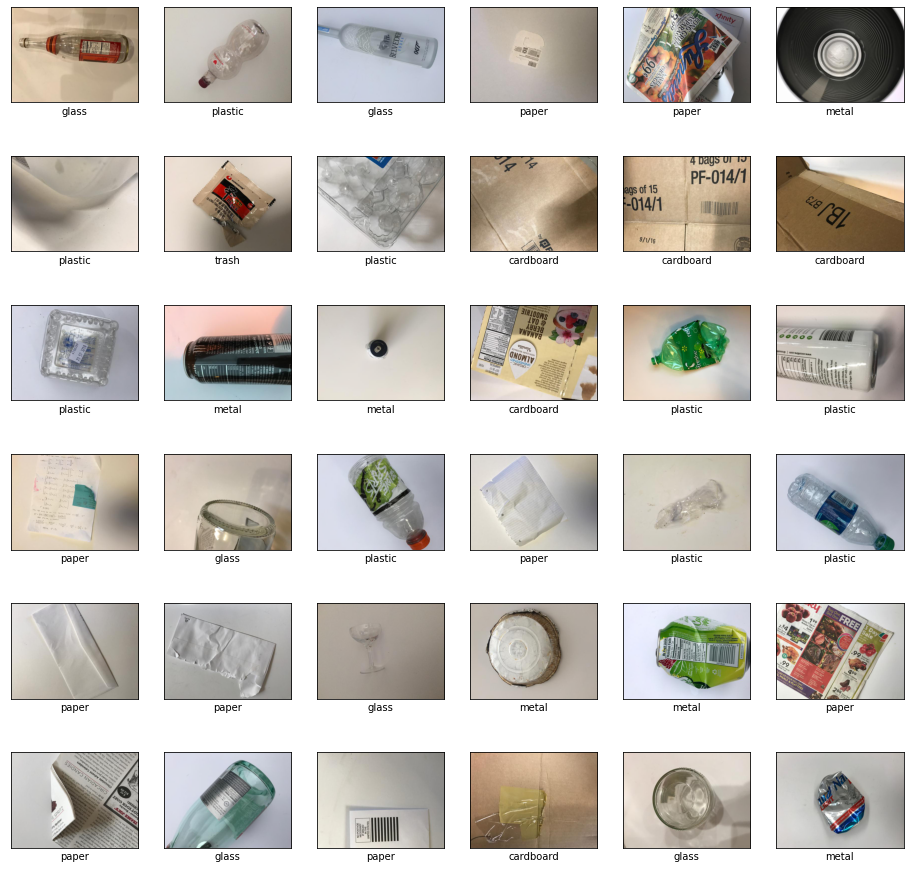

In [48]:
class_names = ['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']
start = 50
end = start + 36
plt.figure(figsize=(16,16))

for i in range(start,end):
    # define subplot
    plt.subplot(6,6,1+i-start)
    plt.xticks([])
    plt.yticks([])
    # plot raw pixel data
    plt.imshow(X_train_norm[i])
    plt.xlabel(class_names[y_train[i][0]])

# show the figure
plt.show()

In [ ]:
# !pip install opencv-python

### Part 2

Redo the same steps as in part 1 but plot the resized images using the block of the code to resize the image. Compare the same images when plotted with the original number of pixels (part 1) versus with the reduced number of pixels. **[6 marks]**

In [49]:
# Use this code instead of the code in the cell above starting from part 2 and after 
# This code will store all resized images in X and all the labels in y
import cv2
X = np.zeros((2527,96,128,3))
y = np.zeros((2527,1))
counter = 0
for L in range(len(labels)):
    directory = os.path.join(data_dir, labels[L])
    for j in range(len(os.listdir(directory))):
        img = cv2.imread(os.path.join(directory, os.listdir(directory)[j]))
        res = cv2.resize(img,dsize=(128,96), interpolation=cv2.INTER_CUBIC)
        X[counter][:][:][:] = res
        y[counter] = L
        counter = counter + 1

X = X.astype('int')
y = y.astype('int')

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('X_train_shape =',X_train.shape)
print('y_train_shape =',y_train.shape)
print('X_test_shape =',X_test.shape)
print('y_test_shape =',y_test.shape)

X_train_shape = (2021, 96, 128, 3)
y_train_shape = (2021, 1)
X_test_shape = (506, 96, 128, 3)
y_test_shape = (506, 1)


In [51]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

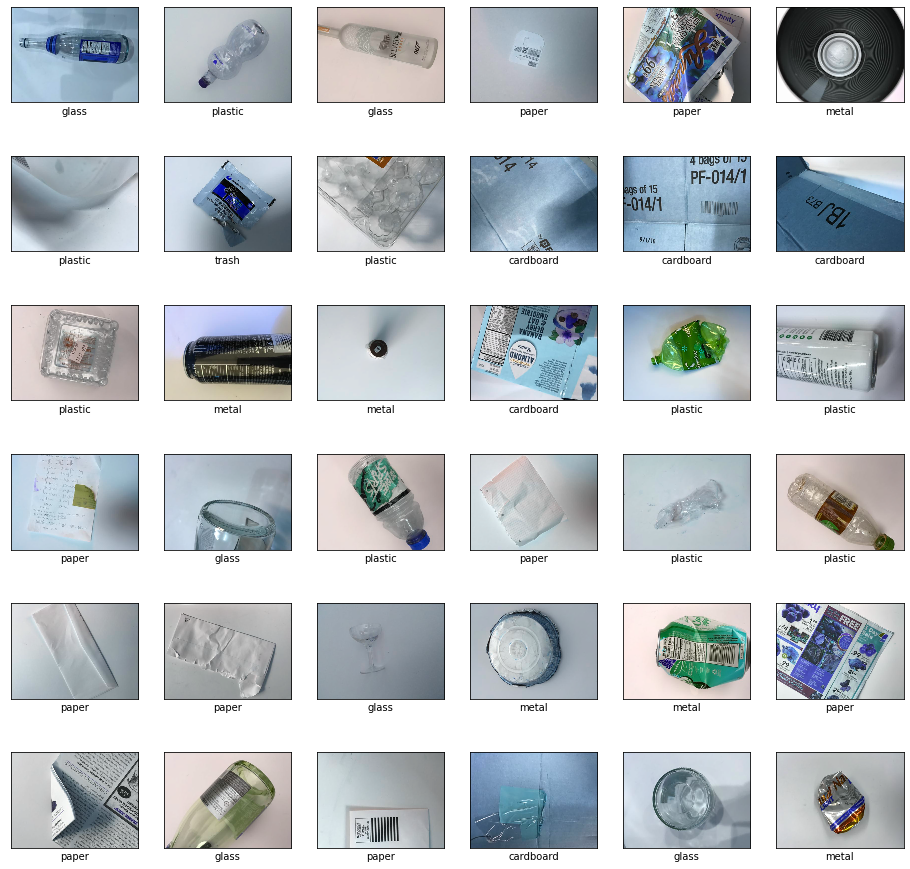

In [52]:
class_names = ['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']
start = 50
end = start + 36
plt.figure(figsize=(16,16))

for i in range(start,end):
    # define subplot
    plt.subplot(6,6,1+i-start)
    plt.xticks([])
    plt.yticks([])
    # plot raw pixel data
    plt.imshow(X_train_norm[i])
    plt.xlabel(class_names[y_train[i][0]])

# show the figure
plt.show()

### Part 3

Train CNN to classify the resized images dataset using categorical crossentropy as loss function with adam optimizer that uses 0.0001, epochs = 50, and batch size = 32. The CNN should use 20% of the training dataset as validation set to stop training if the validation accuracy does not improve for 5 epochs. Also, make the CNN return the best weights by setting restore_best_weight to be true. Report hte loss and accuracy of training and testing at the best epoch, and show the model summary with the numebr of parameters of the model.

In [63]:
from tensorflow.keras import Input, layers, models
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [64]:
dummy_y_train = np_utils.to_categorical(y_train)
print(dummy_y_train)
print(dummy_y_train.shape)

dummy_y_test = np_utils.to_categorical(y_test)
print(dummy_y_test)
print(dummy_y_test.shape)


[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(2021, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
(506, 6)


In [75]:
model = models.Sequential()
model.add(Input(shape=(X_train_norm.shape[1],X_train_norm.shape[2],X_train_norm.shape[3])))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon= 1e-7)
es = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, restore_best_weights=True)

model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_norm, dummy_y_train, epochs=50, batch_size=32, validation_split = 0.20, verbose=1, callbacks=[es])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 94, 126, 32)       896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 47, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 47, 63, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 22, 30, 64)       

In [82]:
train_results = model.evaluate(X_train_norm, dummy_y_train, batch_size=32)

64/64 [==============================] - 4s 66ms/step - loss: 0.8128 - accuracy: 0.7452


In [83]:
test_results = model.evaluate(X_test_norm, dummy_y_test, batch_size=32)

16/16 [==============================] - 1s 67ms/step - loss: 0.9841 - accuracy: 0.6640


### Part 4

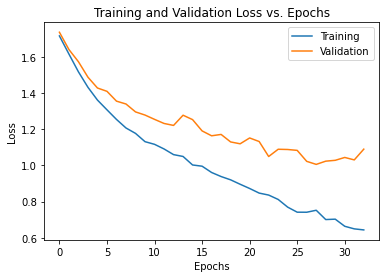

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])

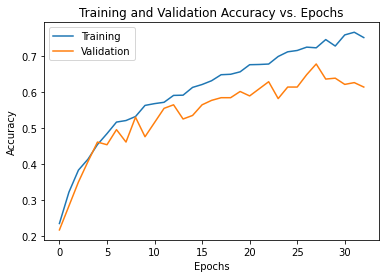

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

### Part 5

In [100]:
y_test_pred = model.predict(X_test_norm, verbose=1)

y_test_pred = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

16/16 [==============================] - 1s 65ms/step


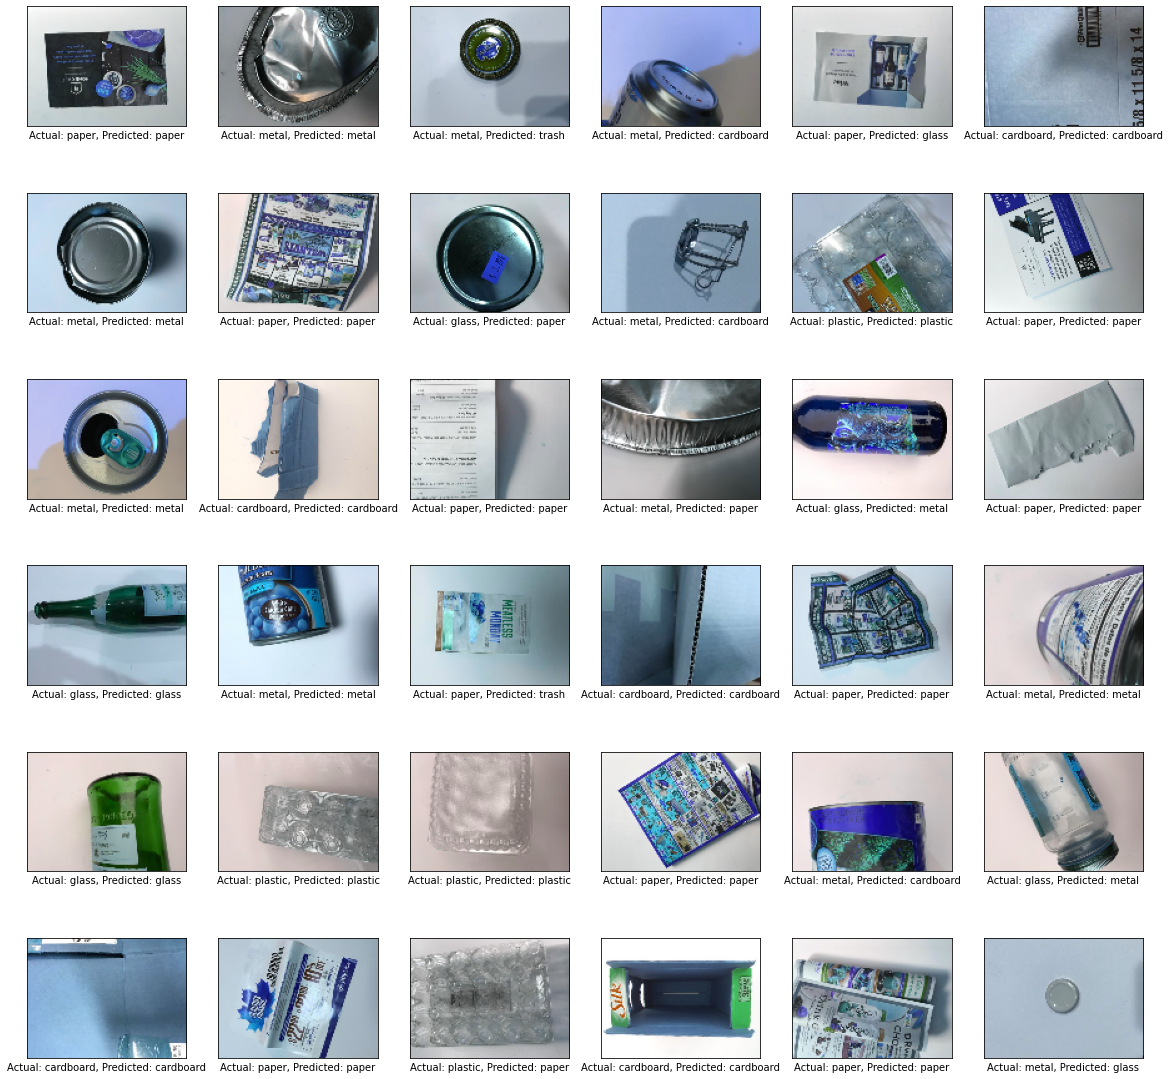

In [101]:
class_names = ['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']
start = 0
end = start + 36
plt.figure(figsize=(20,20))

for i in range(start,end):
    # define subplot
    plt.subplot(6,6,1+i-start)
    plt.xticks([])
    plt.yticks([])
    # plot raw pixel data
    plt.imshow(X_test_norm[i])
    plt.xlabel('Actual: {actual}, Predicted: {pred}'.format(actual=class_names[y_test[i][0]], pred=class_names[y_test_pred[i][0]]))

# show the figure
plt.show()

### Part 6